In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv("covid19_data.csv")

In [6]:
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [7]:
df.shape

(23688, 5)

In [8]:
df["Deaths"].value_counts()

0        12989
1         1244
2          655
3          550
4          324
         ...  
473          1
4603         1
521          1
2600         1
30689        1
Name: Deaths, Length: 1768, dtype: int64

In [9]:
df.columns

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

In [10]:
df.dtypes

Date         object
Country      object
Confirmed     int64
Recovered     int64
Deaths        int64
dtype: object

In [11]:
df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

# EDA

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

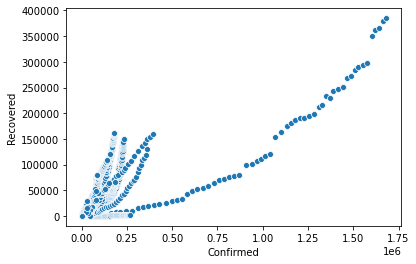

In [13]:
sns.scatterplot(x="Confirmed",y="Recovered",data=df)

In the above column is recovered rate is less than confirmed case

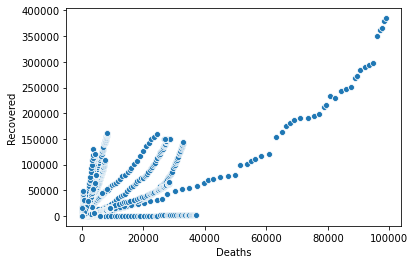

In [14]:
sns.scatterplot(x="Deaths",y="Recovered",data=df)

In the above column death rate is high

# Coorelation

In [15]:
df.corr()

,Confirmed,Recovered,Deaths
Confirmed,1.000000,0.810991,0.929718
Recovered,0.810991,1.000000,0.778094
Deaths,0.929718,0.778094,1.000000


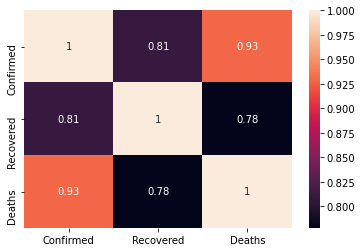

In [16]:
corr=df.corr()

sns.heatmap(corr,annot=True)

Confirmed and Recovered rate has very high coorelation with death variable that is target variable

In [17]:
df.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


Total no of rows=23688
Total no of column=5
Confirmed:
1:Mean:7.969368
2:std:5.842109
3:min:0.0000
4:max:1.680913
    
Recovered:
1:mean:2581.80
2:std:15143
3:min:0.000
4:max:384902

Deaths:
1:Mean:526.93
2:std:3992.8
3:min:0.00
4:max:98913
    
    
In above column shows that Max rate is high than Recovered rate ,and confirmed rate

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 740.3+ KB


# Outlier Checking

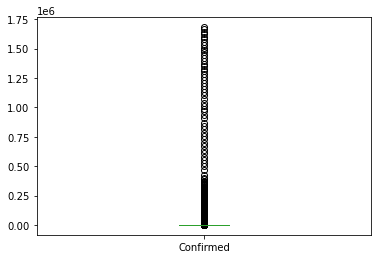

In [19]:
df["Confirmed"].plot.box()

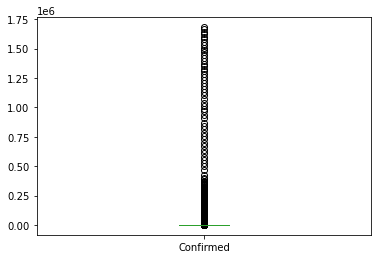

In [20]:
df["Confirmed"].plot.box()

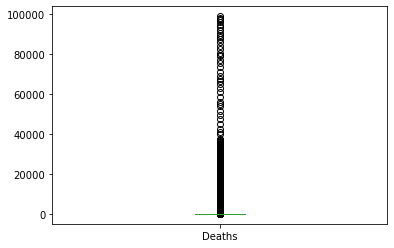

In [21]:
df["Deaths"].plot.box()

In the confirmed,recovered,deaths has extream outlier

# skewness

In [22]:
df.skew()

Confirmed    18.674502
Recovered    10.662286
Deaths       14.218167
dtype: float64

# Distribution of Normal Curve

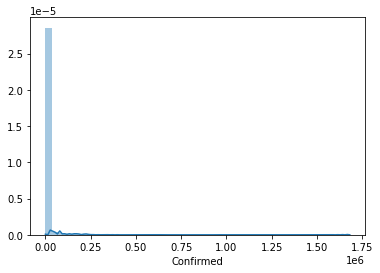

In [23]:
sns.distplot(df["Confirmed"])

 In the above there is no normal curve so there is heavy skewness in data

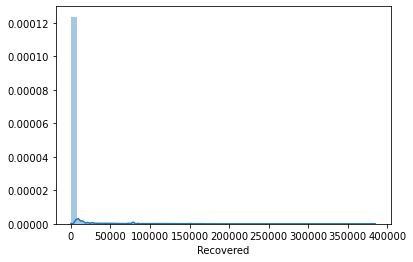

In [24]:
sns.distplot(df["Recovered"])

There is same with Recovered column the curve is out of buliding rock.

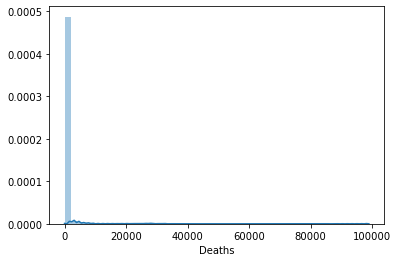

In [25]:
sns.distplot(df["Deaths"])

In the above column the data is not normal ,it is out of building curve

# The normal data shows that data is skewed

# Data cleasing 

In [26]:
df.drop(["Date","Country"],axis=1,inplace=True)

In [27]:
df

,Confirmed,Recovered,Deaths
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
23683,429,365,3
23684,9,6,1
23685,249,10,49
23686,920,336,7


# Removing Outlier


In [28]:
from scipy.stats import zscore
import numpy as np

In [29]:
z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))

(array([ 7932,  8120,  8308,  8496,  8684,  8872,  9060,  9248,  9436,
        9624,  9812, 10000, 10188, 10376, 10564, 10752, 10940, 11128,
       11316, 11504, 11692, 11880, 12068, 12256, 12444, 12632, 12820,
       13008, 13146, 13196, 13245, 13334, 13384, 13433, 13522, 13572,
       13621, 13710, 13760, 13809, 13898, 13948, 13997, 14070, 14086,
       14136, 14185, 14258, 14274, 14274, 14324, 14373, 14446, 14462,
       14462, 14512, 14561, 14634, 14634, 14650, 14650, 14700, 14730,
       14749, 14822, 14822, 14838, 14838, 14888, 14914, 14918, 14937,
       15010, 15010, 15026, 15026, 15076, 15102, 15106, 15125, 15198,
       15198, 15214, 15214, 15264, 15290, 15294, 15313, 15386, 15386,
       15402, 15402, 15452, 15478, 15482, 15501, 15574, 15574, 15590,
       15590, 15594, 15640, 15666, 15670, 15685, 15689, 15762, 15762,
       15778, 15778, 15782, 15828, 15854, 15858, 15873, 15877, 15950,
       15950, 15966, 15966, 15966, 15970, 16016, 16042, 16046, 16061,
       16065, 16138

In [30]:
df_new=df[(z<3).all(axis=1)]
df_new.shape

(23177, 3)

In [31]:
df.shape

(23688, 3)

# Percentage of Data loss

In [32]:
loss_percent=(23688-23177)/2368*100

In [33]:
loss_percent 

21.57939189189189

21% has been data loss ,its a huge amount of data loss

In [34]:
x=df_new.drop("Deaths",axis=1)
y=df_new["Deaths"]

In [35]:
y

0         0
1         0
2         0
3         0
4         0
         ..
23683     3
23684     1
23685    49
23686     7
23687     4
Name: Deaths, Length: 23177, dtype: int64

# transforing data to remove skewness

In [36]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method="yeo-johnson")
x

array([[-1.11523507, -0.92085422],
       [-1.11523507, -0.92085422],
       [-1.11523507, -0.92085422],
       ...,
       [ 0.72632509,  0.37203629],
       [ 1.03027292,  1.28617797],
       [ 0.32944011,  0.67855172]])

In [37]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaledx=sc.fit_transform(x)
scaledx


array([[-1.11523507, -0.92085422],
       [-1.11523507, -0.92085422],
       [-1.11523507, -0.92085422],
       ...,
       [ 0.72632509,  0.37203629],
       [ 1.03027292,  1.28617797],
       [ 0.32944011,  0.67855172]])

In [38]:
y.shape

(23177,)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [40]:
x_train,x_test,y_train,y_test=train_test_split(scaledx,y,test_size=.25,random_state=42)

In [41]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))

0.5603106125970664


In [42]:
print(classification_report(y_test,predlg))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      3228
           1       0.09      0.08      0.08       303
           2       0.03      0.01      0.01       154
           3       0.05      0.03      0.04       140
           4       0.00      0.00      0.00        92
           5       0.00      0.00      0.00        69
           6       0.06      0.07      0.07        82
           7       0.00      0.00      0.00        82
           8       0.00      0.00      0.00        60
           9       0.00      0.00      0.00        76
          10       0.04      0.62      0.07        71
          11       0.00      0.00      0.00        51
          12       0.00      0.00      0.00        36
          13       0.00      0.00      0.00        30
          14       0.02      0.16      0.03        19
          15       0.00      0.00      0.00        16
          16       0.00      0.00      0.00        23
          17       0.00    

In [43]:
print(confusion_matrix(y_test,predlg))

[[3166   50    0 ...    0    0    0]
 [ 266   23    2 ...    0    0    0]
 [ 109   27    1 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]


In [44]:
from sklearn.svm import SVC

In [45]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))


0.5635893011216566


svc is working well,its taking so much time to excute it so i am going with support vector classifier

In [47]:
a=np.array(y_test)

In [48]:
predicted=np.array(svc.predict(x_test))

In [50]:
df_con=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))

In [51]:
df_con

,original,predicted
0,0,0
1,0,0
2,0,0
3,2,2
4,0,0
...,...,...
5790,4,0
5791,0,0
5792,0,0
5793,14,10


In [54]:
import pickle
filename="covid19_data.ipynb"
pickle.dump(svc,open(filename,"wb"))

In [56]:
import pickle
filename="covid19_data.pkl"
pickle.dump(svc,open(filename,"wb"))